# Open Science: Asynchronous and Synchronous online classes

<img src="picture.png">

Studying remotely can be quite hard when it comes to staying focused for hours in front of a screen. 
Today, online classes can be followed synchronously or asynchronously, meaning you can either attend the class the same time your teacher and fellow students do or watch recorded ones. 
We think that these modes of learning can influence the attentiveness of students. Also, we would like to understand more about the interaction between the learners and their teachers during remote classes. 

In order to determine the impact of synchronicity on students' attentiveness, we created a survey and we did the following data analysis.

# Research Question:
## **What is the impact of the synchronicity of an online class on a student’s attention?**

**Investigation of an individual's attentivity based on one’s interaction during synchronous and asynchronous classes.**


**Our Hypothesis: Some aspects of synchronous online classes allow us to have more interaction. The more interaction we have, the more attentive we are.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stats
import pandas as pd
import operator

from textwrap import wrap
import seaborn as sns

In [2]:
file = pd.read_csv('open_science_65.csv', delimiter=',')
file

,Timestamp,Are you ...,In which establishment are you?,How involved do you think your students are during the classes that you give online?,What kind of participation do you ask your students to give?,How many breaks do you have during your online classes?,Do you notice if your students are focused on something else during the course?,Do you ask your students to turn their camera/audio on?,Do you think that turning the cameras on helps the students with paying more attention during online classes?,Do you monitor presentation slides or students cameras while delivering lectures?,...,"If you do multitask, what kind of activities do you do?",Have you considered yourself attentive during synchronous class?,Do you take notes during online classes?,Why did you attend them?,How long was your last asynchronous class?,How often do you pause the asynchronous class?,Have you considered yourself attentive during asynchronous class?,Do you take notes during online classes?.1,Which one is your favorite?,Do you think the synchronicity of an online class has an impact on your attention?
0,12/9/2020 10:10:46,A teacher?,NaN,4.0,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/9/2020 10:23:37,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"House chores, Playing online games",4.0,1.0,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4.0,1.0,"Asynchronous classes (MOOCs, recordings)",4.0
2,12/9/2020 11:36:20,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Just getting distracted by anything around me,4.0,4.0,I was really interested by a MOOC,< 30 mins,Just one in the middle of the session,4.0,3.0,Synchronous classes (Zoom call),5.0
3,12/9/2020 12:14:06,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Work and studies related tasks,4.0,5.0,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4.0,5.0,"Neither, in person classes",3.0
4,12/9/2020 12:23:41,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1/5/2021 9:19:00,A student?,UCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Work and studies related tasks, Wandering on t...",2.0,5.0,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5.0
61,1/5/2021 10:56:35,A student?,UFR Liévin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Work and studies related tasks, Talking to col...",3.0,4.0,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5.0
62,1/5/2021 20:00:51,A student?,Université Paul Sabatier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"House chores, Just getting distracted by anyth...",4.0,5.0,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5.0
63,1/5/2021 23:13:10,A student?,University Toulouse III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5.0


In [3]:
file.shape

(65, 42)

In [4]:
file.head(3)

,Timestamp,Are you ...,In which establishment are you?,How involved do you think your students are during the classes that you give online?,What kind of participation do you ask your students to give?,How many breaks do you have during your online classes?,Do you notice if your students are focused on something else during the course?,Do you ask your students to turn their camera/audio on?,Do you think that turning the cameras on helps the students with paying more attention during online classes?,Do you monitor presentation slides or students cameras while delivering lectures?,...,"If you do multitask, what kind of activities do you do?",Have you considered yourself attentive during synchronous class?,Do you take notes during online classes?,Why did you attend them?,How long was your last asynchronous class?,How often do you pause the asynchronous class?,Have you considered yourself attentive during asynchronous class?,Do you take notes during online classes?.1,Which one is your favorite?,Do you think the synchronicity of an online class has an impact on your attention?
0,12/9/2020 10:10:46,A teacher?,NaN,4.0,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/9/2020 10:23:37,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"House chores, Playing online games",4.0,1.0,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4.0,1.0,"Asynchronous classes (MOOCs, recordings)",4.0
2,12/9/2020 11:36:20,A student?,CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Just getting distracted by anything around me,4.0,4.0,I was really interested by a MOOC,< 30 mins,Just one in the middle of the session,4.0,3.0,Synchronous classes (Zoom call),5.0


**Global Functions**

In [5]:
# Function used throughout the notebook
def create_clean_dict(uniq_list):
    clean_dict = dict()
    for i, j in enumerate(uniq_list):
        print(i, j)
        clean_dict[j] = i
    return clean_dict

In [6]:
def set_text_bold(text):
    return r"$\bf{" + text  + "}$"

# Data Extraction
Extracting all the data needed and making it easy to use

In [7]:
file.columns

Index(['Timestamp', 'Are you ...', 'In which establishment are you?',
       'How involved do you think your students are during the classes that you give online?',
       'What kind of participation do you ask your students to give?',
       'How many breaks do you have during your online classes?',
       'Do you notice if your students are focused on something else during the course?',
       'Do you ask your students to turn their camera/audio on?',
       'Do you think that turning the cameras on helps the students with paying more attention during online classes?',
       'Do you monitor presentation slides or students cameras while delivering lectures?',
       'Would you describe your course lectures as...',
       'Are you more fatigued by... ',
       'What is the most challenging when giving online classes?',
       'Which track are you?', 'How comfortable are you with technology?',
       'Do you usually prefer learning from...',
       'Did you attend any asynchronous clas

In [8]:
async_col = "How often do you use your phone or computer for another purpose than the course itself?"
sync_col = "How often do you use your phone or computer for another purpose than the course itself? "

file = file.rename(columns={
    async_col: "How often do you use your phone or computer for another purpose than the course itself? (asynchronous)",
    sync_col: "How often do you use your phone or computer for another purpose than the course itself?",
})

file.columns = file.columns.str.rstrip()


In [9]:
file = file.rename(columns={
    # both students and teachers
    "Are you ...": "role",
    
    # students only with s_
    "Which track are you?": 's_track',
    "In which establishment are you?": 's_establishment',
    "How comfortable are you with technology?": 's_comfortable_technology',
    "Do you usually prefer learning from...": 's_prefer_learning',
    "Did you attend any asynchronous classes lately?": 's_any_asyn', #key column
    "Did you attend any online synchronous classes?": 's_any_sync', #key column

    "Which one is your favorite?": "s_favorite",
    "How often do you get distracted from the asynchronous class?": 's_distracted_async',
    "How often do you get distracted from the synchronous class?": 's_distracted_sync',
    "How often do you use your phone or computer for another purpose than the course itself? (asynchronous)": 's_phone_usage_async',
    "How often do you use your phone or computer for another purpose than the course itself?": 's_phone_usage_sync',
    "While attending online classes do you sit.. (tick multiple)": 's_sit_async',
    "While attending online classes do you sit.. (tick multiple).1": 's_sit_sync',
    "How focused are you in an asynchronous online class?": 's_focus_async',
    "How focused are you in an synchronous online class?": "s_focus_sync", 
    "Why did you attend synchronous class?": 's_why_sync',
    "Why did you attend them?": 's_why_async',
    
    "How were your classes taught before lockdown?": 's_before_lockdown',
    "Do you have your camera on or off most of the time?": "s_camera_status",
    "When you're not asked, do you still turn on your camera?": 's_camera_not_asked',
    "How many questions do you usually ask during a synchronous online class?": 's_questions_sync',
    "Do you usually multitask during online class?": 's_multitask',
    "If you do multitask, what kind of activities do you do?": 's_multitask_activities',
    "Have you considered yourself attentive during asynchronous class?": 's_attentive_async_reflect',
    "Have you considered yourself attentive during synchronous class?": 's_attentive_sync_reflect',
    "Do you take notes during online classes?": 's_notes_async',
    "Do you take notes during online classes?.1": 's_notes_sync',
    "How long was your last asynchronous class?": 's_duration_last_async',
    "How often do you pause the asynchronous class?": 's_pause_async',
    "Do you think the synchronicity of an online class has an impact on your attention?": 's_sync_impact_on_attention',
    
    
    # teachers only with t_
    "How involved do you think your students are during the classes that you give online?": 't_involved',
    "What kind of participation do you ask your students to give?": 't_participation_type',
    "How many breaks do you have during your online classes?": 't_nb_breaks',
    "Do you notice if your students are focused on something else during the course?": 't_notice_unfocused',
    "Do you ask your students to turn their camera/audio on?": 't_camera_audio_on',
    "Do you think that turning the cameras on helps the students with paying more attention during online classes?": 't_camera_helps',
    "Do you monitor presentation slides or students cameras while delivering lectures?": 't_screen_monitoring',
    "Would you describe your course lectures as...": 't_describe_courses',
    "Are you more fatigued by...": 't_fatigued_by',
    "What is the most challenging when giving online classes?": "t_challenges"
})

In [10]:
# Check if all questions in columns have been replaced
file.columns
for i in file.columns:
    print(i)

Timestamp
role
s_establishment
t_involved
t_participation_type
t_nb_breaks
t_notice_unfocused
t_camera_audio_on
t_camera_helps
t_screen_monitoring
t_describe_courses
t_fatigued_by
t_challenges
s_track
s_comfortable_technology
s_prefer_learning
s_any_asyn
s_any_sync
s_focus_async
s_distracted_async
s_phone_usage_async
s_sit_async
s_focus_sync
s_distracted_sync
s_phone_usage_sync
s_sit_sync
s_why_sync
s_before_lockdown
s_camera_status
s_camera_not_asked
s_questions_sync
s_multitask
s_multitask_activities
s_attentive_sync_reflect
s_notes_async
s_why_async
s_duration_last_async
s_pause_async
s_attentive_async_reflect
s_notes_sync
s_favorite
s_sync_impact_on_attention


Check who participates for teachers before extracting roles

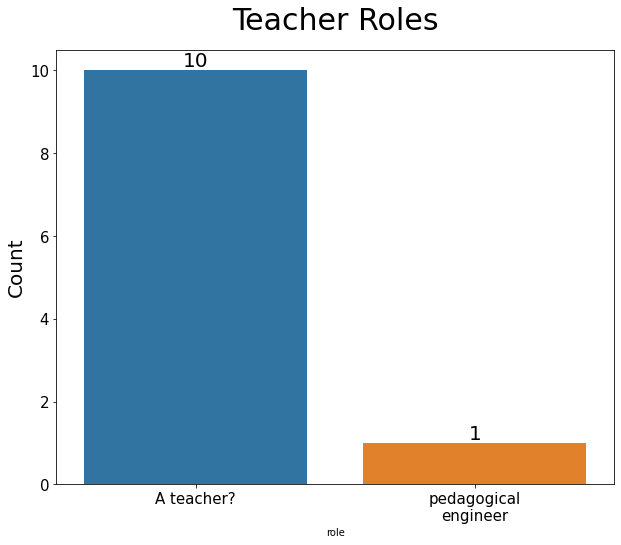

In [11]:
plt.figure(figsize=(10, 8))
data = file[file["role"].isin(["A teacher?", "pedagogical engineer"])]
ax = sns.countplot(data=data, x='role')

plt.xlabel('role')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Count', fontsize=20)
plt.title('Teacher Roles', fontsize=30, pad=20)

i = 0
total=len(data)
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = data[data['role'] == label.get_text()]['role'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, value,ha="center", fontsize=20)
    i += 1
   
ax.set_xticklabels( [ '\n'.join(wrap(l, 12)) for l in [i.get_text() for i in ax.get_xticklabels()] ])
plt.show()

Check the different roles of participants

In [12]:
file["role"].unique()

array(['A teacher?', 'A student?', 'Recent graduate',
       'pedagogical engineer', 'Currently employed '], dtype=object)

In [13]:
df_teachers = file[file["role"].isin(["A teacher?", "pedagogical engineer"])]
df_students = file[file["role"].isin(["A student?", "Recent graduate", "Currently employed "])]
print(df_teachers.shape)
print(df_students.shape)

(11, 42)
(54, 42)


In [14]:
# remove teachers questions from students ids and vice-versa

df_students = df_students.loc[:,~df_students.columns.str.startswith('t_')]
df_students.head(2)

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_multitask_activities,s_attentive_sync_reflect,s_notes_async,s_why_async,s_duration_last_async,s_pause_async,s_attentive_async_reflect,s_notes_sync,s_favorite,s_sync_impact_on_attention
1,12/9/2020 10:23:37,A student?,CRI,DiSc,5.0,"Books, Online articles and tutorials, Online v...",Yes,Yes,5.0,2.0,...,"House chores, Playing online games",4.0,1.0,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4.0,1.0,"Asynchronous classes (MOOCs, recordings)",4.0
2,12/9/2020 11:36:20,A student?,CRI,LiSc,4.0,"Books, Online articles and tutorials, Online v...",Yes,Yes,4.0,2.0,...,Just getting distracted by anything around me,4.0,4.0,I was really interested by a MOOC,< 30 mins,Just one in the middle of the session,4.0,3.0,Synchronous classes (Zoom call),5.0


In [15]:
df_teachers = df_teachers.loc[:,~df_teachers.columns.str.startswith('s_')]
df_teachers.head(2)

,Timestamp,role,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by,t_challenges
0,12/9/2020 10:10:46,A teacher?,4.0,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3.0,3.0,Online synchronous classes,To make sure participants understand the topic...
18,12/9/2020 18:18:17,A teacher?,3.0,"I ask them some questions, I ask them to give ...",1,No,"Yes, but not mandatory",Yes,3.0,2.0,Online asynchronous classes,How to keep students motivated until the end o...


Teachers

In [16]:
# Replace None by 0
# Remove rows with more than 5 fields nan

df_teachers['t_nb_breaks'] = df_teachers['t_nb_breaks'].replace('None', 0)
df_teachers = df_teachers[df_teachers.isnull().sum(axis=1) < 5]
df_teachers.head(2)

,Timestamp,role,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by,t_challenges
0,12/9/2020 10:10:46,A teacher?,4.0,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3.0,3.0,Online synchronous classes,To make sure participants understand the topic...
18,12/9/2020 18:18:17,A teacher?,3.0,"I ask them some questions, I ask them to give ...",1,No,"Yes, but not mandatory",Yes,3.0,2.0,Online asynchronous classes,How to keep students motivated until the end o...


In [17]:
df_teachers = df_teachers.astype({
    "t_involved": int,
    "t_nb_breaks": int,
    "t_screen_monitoring": int,
    "t_describe_courses": int
})

df_teachers.head(2)

,Timestamp,role,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by,t_challenges
0,12/9/2020 10:10:46,A teacher?,4,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3,3,Online synchronous classes,To make sure participants understand the topic...
18,12/9/2020 18:18:17,A teacher?,3,"I ask them some questions, I ask them to give ...",1,No,"Yes, but not mandatory",Yes,3,2,Online asynchronous classes,How to keep students motivated until the end o...


Students

In [18]:
df_students['s_prefer_learning'] = df_students['s_prefer_learning'].str.replace(";", ',')

In [19]:
df_students.head(2)

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_multitask_activities,s_attentive_sync_reflect,s_notes_async,s_why_async,s_duration_last_async,s_pause_async,s_attentive_async_reflect,s_notes_sync,s_favorite,s_sync_impact_on_attention
1,12/9/2020 10:23:37,A student?,CRI,DiSc,5.0,"Books, Online articles and tutorials, Online v...",Yes,Yes,5.0,2.0,...,"House chores, Playing online games",4.0,1.0,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4.0,1.0,"Asynchronous classes (MOOCs, recordings)",4.0
2,12/9/2020 11:36:20,A student?,CRI,LiSc,4.0,"Books, Online articles and tutorials, Online v...",Yes,Yes,4.0,2.0,...,Just getting distracted by anything around me,4.0,4.0,I was really interested by a MOOC,< 30 mins,Just one in the middle of the session,4.0,3.0,Synchronous classes (Zoom call),5.0


In [20]:
def convert2_integer(cols):
    for col in cols:
        df_students[col] = df_students[col].fillna(-1)
        df_students[col] = df_students[col].astype(int)
        df_students[col] = df_students[col].astype(str)
        df_students[col] = df_students[col].replace('-1', np.nan)
        
convert2_integer(
    ["s_comfortable_technology",
    "s_focus_async",
    "s_phone_usage_sync",
    "s_distracted_async",
    "s_attentive_sync_reflect",
    "s_camera_status",
    "s_camera_status",
    "s_notes_async",
    "s_attentive_async_reflect",
    "s_sync_impact_on_attention",
    "s_questions_sync",
    "s_multitask",
    "s_notes_sync",
    "s_focus_sync"]
)

df_students.head(2)

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_multitask_activities,s_attentive_sync_reflect,s_notes_async,s_why_async,s_duration_last_async,s_pause_async,s_attentive_async_reflect,s_notes_sync,s_favorite,s_sync_impact_on_attention
1,12/9/2020 10:23:37,A student?,CRI,DiSc,5,"Books, Online articles and tutorials, Online v...",Yes,Yes,5,2,...,"House chores, Playing online games",4,1,I was really interested by a MOOC,> 1 hour,"Twice, or maybe more",4,1,"Asynchronous classes (MOOCs, recordings)",4
2,12/9/2020 11:36:20,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Online v...",Yes,Yes,4,2,...,Just getting distracted by anything around me,4,4,I was really interested by a MOOC,< 30 mins,Just one in the middle of the session,4,3,Synchronous classes (Zoom call),5


In [21]:
df_students.dtypes

Timestamp                      object
role                           object
s_establishment                object
s_track                        object
s_comfortable_technology       object
s_prefer_learning              object
s_any_asyn                     object
s_any_sync                     object
s_focus_async                  object
s_distracted_async             object
s_phone_usage_async           float64
s_sit_async                    object
s_focus_sync                   object
s_distracted_sync             float64
s_phone_usage_sync             object
s_sit_sync                     object
s_why_sync                     object
s_before_lockdown              object
s_camera_status                object
s_camera_not_asked             object
s_questions_sync               object
s_multitask                    object
s_multitask_activities         object
s_attentive_sync_reflect       object
s_notes_async                  object
s_why_async                    object
s_duration_l

In [22]:
df_students.isnull().sum() 

Timestamp                      0
role                           0
s_establishment                2
s_track                       24
s_comfortable_technology       0
s_prefer_learning              0
s_any_asyn                     0
s_any_sync                     0
s_focus_async                 20
s_distracted_async            20
s_phone_usage_async           20
s_sit_async                   20
s_focus_sync                   7
s_distracted_sync              7
s_phone_usage_sync             7
s_sit_sync                     7
s_why_sync                     7
s_before_lockdown              7
s_camera_status                7
s_camera_not_asked             7
s_questions_sync               7
s_multitask                    7
s_multitask_activities         7
s_attentive_sync_reflect       7
s_notes_async                  7
s_why_async                   20
s_duration_last_async         20
s_pause_async                 20
s_attentive_async_reflect     20
s_notes_sync                  20
s_favorite

In [23]:
# Students who never had synchronous and asynchronous online classes

df_students[np.logical_and(df_students['s_any_asyn'] == 'No', df_students['s_any_sync'] == 'No')]

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_multitask_activities,s_attentive_sync_reflect,s_notes_async,s_why_async,s_duration_last_async,s_pause_async,s_attentive_async_reflect,s_notes_sync,s_favorite,s_sync_impact_on_attention
4,12/9/2020 12:23:41,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Other",No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",3
20,12/9/2020 20:43:36,A student?,université de LYON,NaN,4,Online articles and tutorials,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Synchronous classes (Zoom call),4
63,1/5/2021 23:13:10,A student?,University Toulouse III,NaN,4,"Online articles and tutorials, Online videos",No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5


In [24]:
# Students who never had asynchronous online classes

df_students[np.logical_and(df_students['s_any_asyn'] == 'No', df_students['s_any_sync'] == 'Yes')]

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_multitask_activities,s_attentive_sync_reflect,s_notes_async,s_why_async,s_duration_last_async,s_pause_async,s_attentive_async_reflect,s_notes_sync,s_favorite,s_sync_impact_on_attention
7,12/9/2020 14:19:19,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"Just getting distracted by anything around me,...",3,3,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5
11,12/9/2020 14:33:26,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"Just getting distracted by anything around me,...",3,5,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",4
13,12/9/2020 14:51:21,A student?,CRI,LeSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"House chores, Just getting distracted by anyth...",3,4,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5
25,12/10/2020 12:04:29,A student?,CRI,BSc (Bachelor's),4,Books,No,Yes,NaN,NaN,...,"House chores, Just getting distracted by anyth...",4,4,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5
28,12/10/2020 15:46:57,A student?,CRI,LeSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"Chating with friends, Playing online games",3,1,NaN,NaN,NaN,NaN,NaN,Synchronous classes (Zoom call),4
30,12/11/2020 1:11:30,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"Just getting distracted by anything around me,...",3,1,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",4
42,12/23/2020 16:27:24,Currently employed,NaN,NaN,3,Online articles and tutorials,No,Yes,NaN,NaN,...,I don't multitask,4,4,NaN,NaN,NaN,NaN,NaN,Synchronous classes (Zoom call),5
43,12/23/2020 20:10:38,A student?,CRI,LeSc,4,"Books, Online articles and tutorials, Online v...",No,Yes,NaN,NaN,...,"Just getting distracted by anything around me,...",4,3,NaN,NaN,NaN,NaN,NaN,I don't have a preference. They all have their...,4
50,1/4/2021 13:54:49,A student?,Staps,NaN,4,Books,No,Yes,NaN,NaN,...,"Just getting distracted by anything around me,...",4,5,NaN,NaN,NaN,NaN,NaN,"Neither, in person classes",5
51,1/4/2021 15:59:37,A student?,Université Paul Sabatier,NaN,5,"Books, Online videos",No,Yes,NaN,NaN,...,"House chores, Work and studies related tasks, ...",4,5,NaN,NaN,NaN,NaN,NaN,Synchronous classes (Zoom call),3


In [25]:
# Create columns from a list of values (s_prefer_learning to s_pref_books, s_pref_articles_tutorials, s_pref_videos, s_pref_other)
# Rename Columns

df_students = pd.concat([df_students, df_students["s_prefer_learning"].str.get_dummies(',')], axis=1)  

df_students = df_students.rename(columns={
    "Books": "s_pref_books",
    "Online articles and tutorials": "s_pref_articles_tutorials",
    "Online videos": "s_pref_videos",
    "Other": "s_pref_other"
})

df_students.head(2)

,Timestamp,role,s_establishment,s_track,s_comfortable_technology,s_prefer_learning,s_any_asyn,s_any_sync,s_focus_async,s_distracted_async,...,s_notes_sync,s_favorite,s_sync_impact_on_attention,Online articles and tutorials,Online videos,Other,s_pref_books,s_pref_articles_tutorials,s_pref_videos,s_pref_other
1,12/9/2020 10:23:37,A student?,CRI,DiSc,5,"Books, Online articles and tutorials, Online v...",Yes,Yes,5,2,...,1,"Asynchronous classes (MOOCs, recordings)",4,1,1,0,1,0,0,0
2,12/9/2020 11:36:20,A student?,CRI,LiSc,4,"Books, Online articles and tutorials, Online v...",Yes,Yes,4,2,...,3,Synchronous classes (Zoom call),5,1,1,0,1,0,0,0


# Exploratory data analysis

In [26]:
df_students.columns

Index(['Timestamp', 'role', 's_establishment', 's_track',
       's_comfortable_technology', 's_prefer_learning', 's_any_asyn',
       's_any_sync', 's_focus_async', 's_distracted_async',
       's_phone_usage_async', 's_sit_async', 's_focus_sync',
       's_distracted_sync', 's_phone_usage_sync', 's_sit_sync', 's_why_sync',
       's_before_lockdown', 's_camera_status', 's_camera_not_asked',
       's_questions_sync', 's_multitask', 's_multitask_activities',
       's_attentive_sync_reflect', 's_notes_async', 's_why_async',
       's_duration_last_async', 's_pause_async', 's_attentive_async_reflect',
       's_notes_sync', 's_favorite', 's_sync_impact_on_attention',
       ' Online articles and tutorials', ' Online videos', ' Other',
       's_pref_books', 's_pref_articles_tutorials', 's_pref_videos',
       's_pref_other'],
      dtype='object')

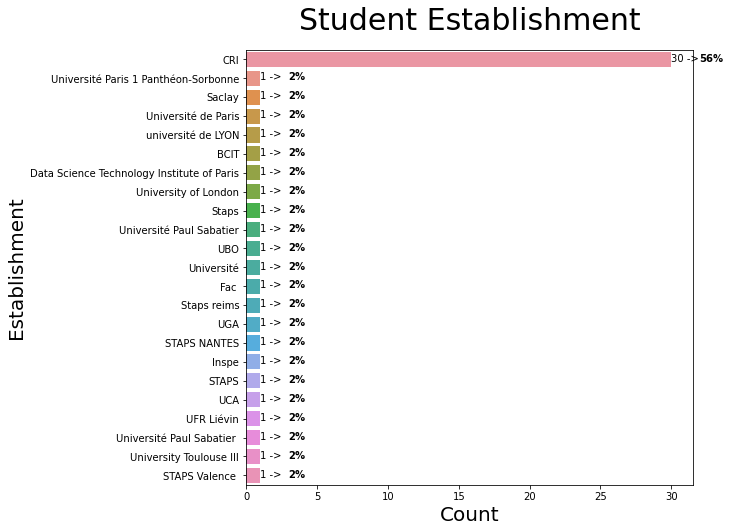

In [27]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df_students, y='s_establishment')

plt.xlabel('Count', fontsize=20)
plt.ylabel('Establishment', fontsize=20)
plt.title('Student Establishment', fontsize=30, pad=20)

total = float(len(df_students))
for i in ax.patches:
    width = i.get_width()
    ax.text(i.get_width(), i.get_y() + 0.5, '{0} -> '.format(width), fontsize=10)
    ax.text(i.get_width()+2, i.get_y()+ 0.5, '{0:.0%}'.format(width/total), fontsize=10, weight='bold')

plt.show()

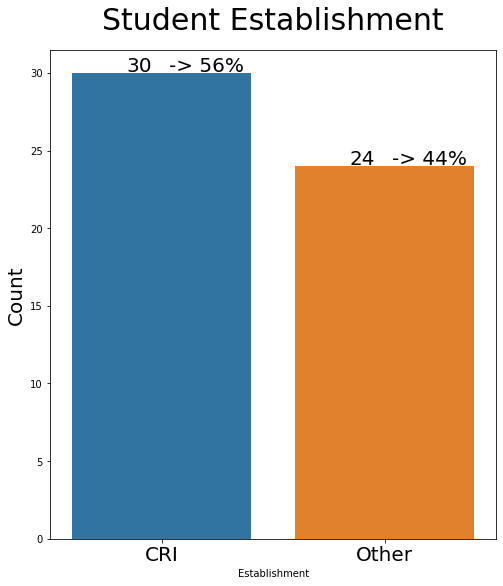

In [28]:
plt.figure(figsize=(8, 9))

data = df_students.copy()
data['s_establishment'] = data['s_establishment'].apply(lambda role: 'Other' if role != 'CRI' else role)

ax = sns.countplot(data=data, x='s_establishment')

plt.ylabel('Count', fontsize=20)
plt.xlabel('Establishment')
plt.xticks(fontsize=20)
plt.title('Student Establishment', fontsize=30, pad=20)

total = float(len(data))
i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = data[data['s_establishment'] == label.get_text()]['s_establishment'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. - 0.1, height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.show()

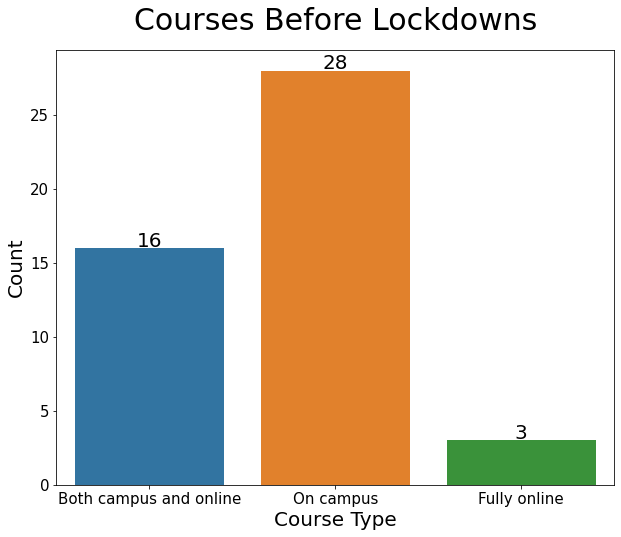

In [29]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_students, x='s_before_lockdown')

plt.xlabel('Course Type', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Count', fontsize=20)
plt.title('Courses Before Lockdowns', fontsize=30, pad=20)

i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_students[df_students['s_before_lockdown'] == label.get_text()]['s_before_lockdown'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, value,ha="center", fontsize=20)
    i += 1

plt.show()

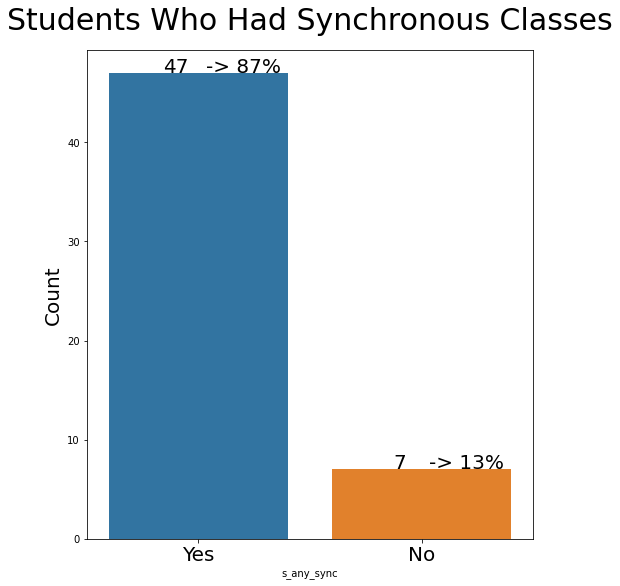

In [30]:
plt.figure(figsize=(8, 9))

ax = sns.countplot(data=df_students, x='s_any_sync')

plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.title('Students Who Had Synchronous Classes', fontsize=30, pad=20)

total = float(len(df_students))
i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_students[df_students['s_any_sync'] == label.get_text()]['s_any_sync'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. - 0.1, height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.show()

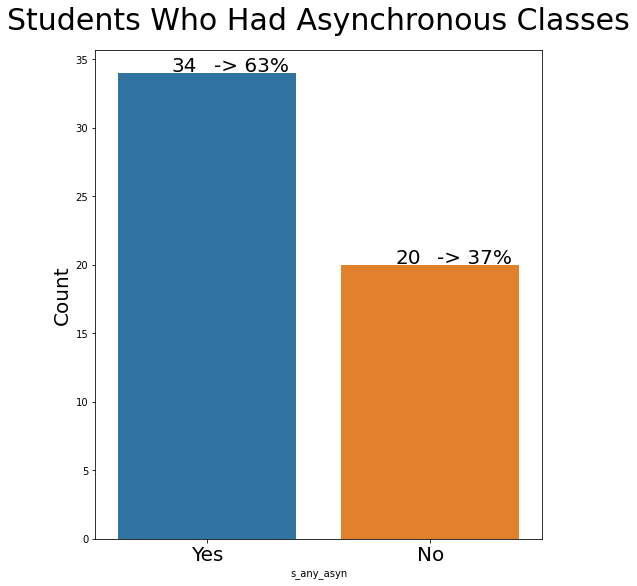

In [31]:
plt.figure(figsize=(8, 9))

ax = sns.countplot(data=df_students, x='s_any_asyn')

plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.title('Students Who Had Asynchronous Classes', fontsize=30, pad=20)

total = float(len(df_students))
i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_students[df_students['s_any_asyn'] == label.get_text()]['s_any_asyn'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. - 0.1, height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.show()

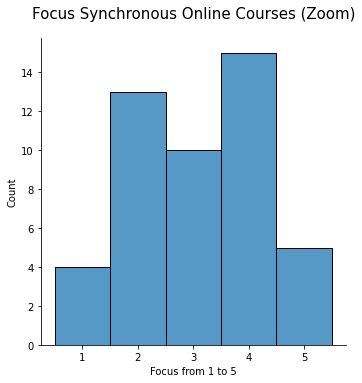

In [32]:
ax = sns.displot(df_students[df_students['s_focus_sync'].notnull()].sort_values(by='s_focus_sync'), x="s_focus_sync")

plt.xlabel("Focus from 1 to 5", fontsize=10)
plt.title("Focus Synchronous Online Courses (Zoom)", fontsize=15, pad=20)

plt.show()

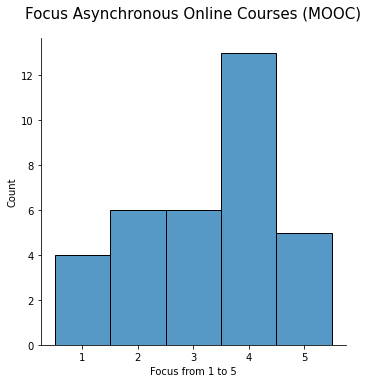

In [33]:
ax = sns.displot(df_students[df_students['s_focus_async'].notnull()].sort_values(by='s_focus_async'), x="s_focus_async")

plt.xlabel("Focus from 1 to 5", fontsize=10)
plt.title("Focus Asynchronous Online Courses (MOOC)", fontsize=15, pad=20)
plt.show()

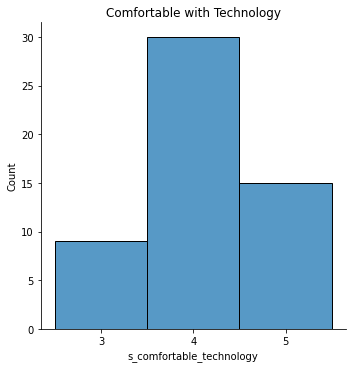

In [34]:
sns.displot(df_students[df_students['s_comfortable_technology'].notnull()].sort_values(by='s_comfortable_technology'),
            x="s_comfortable_technology")

plt.title('Comfortable with Technology')
plt.show()

# Students:
# Our Hypothesis: Some aspects of synchronous online classes allow us to have more interaction. The more interaction we have, the more attentive we are.


## 1) Distraction - Focus
## 2) Interaction - Focus
## 3) Prefered - Focus

Track - Focus - Comfortable with Technology

In [35]:
df_track_focus = df_students[[
    's_establishment', 's_track', 's_comfortable_technology',
    's_focus_async', 's_focus_sync', 's_any_sync', 's_any_asyn'
]]
df_track_focus = df_track_focus[df_track_focus['s_establishment'] == 'CRI'].drop('s_establishment', axis=1)

print(df_track_focus.shape)
df_track_focus.head(2)

(30, 6)


,s_track,s_comfortable_technology,s_focus_async,s_focus_sync,s_any_sync,s_any_asyn
1,DiSc,5,5,4,Yes,Yes
2,LiSc,4,4,5,Yes,Yes


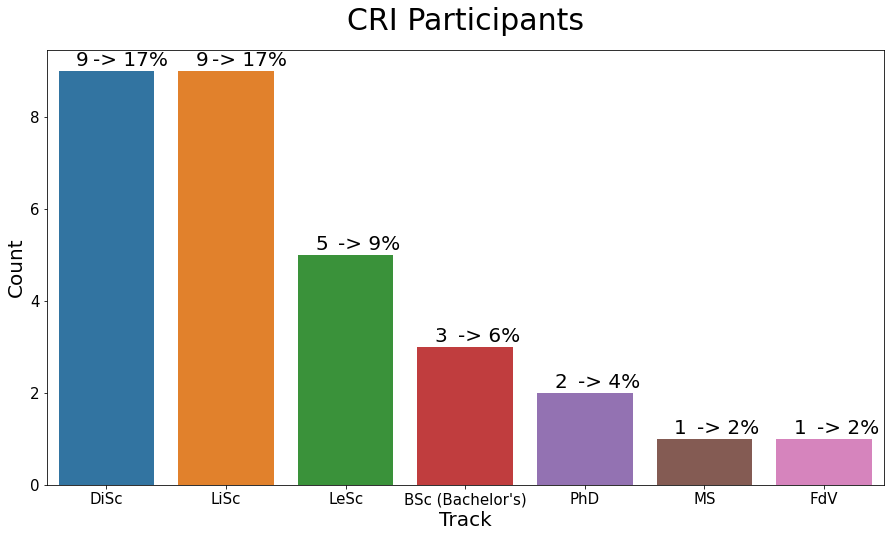

In [36]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_track_focus, x='s_track')

plt.xlabel('Track', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Count', fontsize=20)
plt.title('CRI Participants', fontsize=30, pad=20)

i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_track_focus[df_track_focus['s_track'] == label.get_text()]['s_track'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. - 0.2, height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


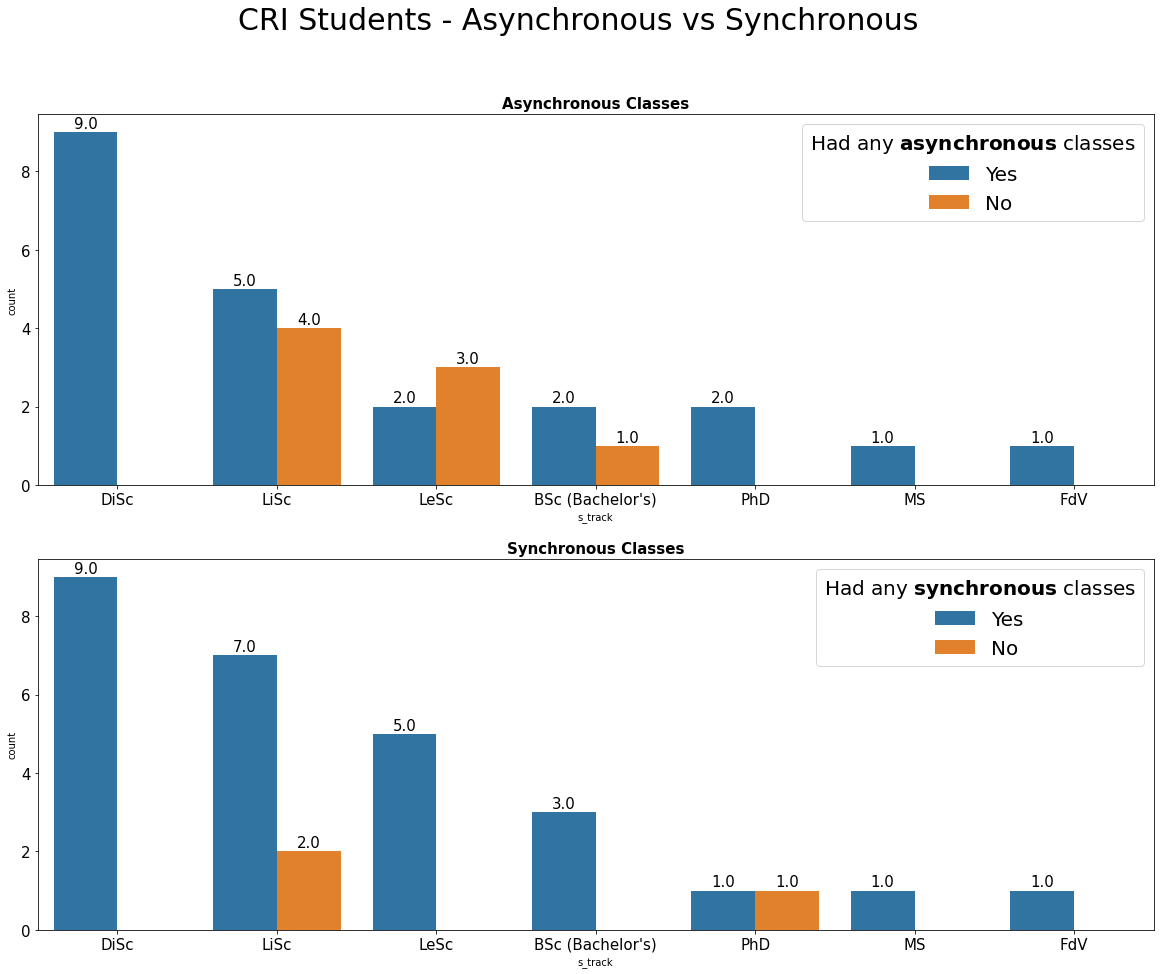

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

plt.suptitle('CRI Students - Asynchronous vs Synchronous', fontsize=30)

ax = sns.countplot(ax=axes[0], data=df_track_focus, x='s_track', hue='s_any_asyn')
ax.tick_params(axis='both', which='major', labelsize=15)
axes[0].set_title('Asynchronous Classes', weight='bold', fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(np.around(p.get_x() + p.get_width()/2., decimals=1),
            height + 0.1,
            height,
            ha="center", fontsize=15)
ax.legend(title="Had any " + set_text_bold("asynchronous")+ " classes", fontsize=20, title_fontsize=20, loc=1)

    
ax = sns.countplot(ax=axes[1], data=df_track_focus, x='s_track', hue='s_any_sync')
axes[1].set_title('Synchronous Classes', weight='bold', fontsize=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(np.around(p.get_x() + p.get_width()/2., decimals=1),
            height + 0.1,
            height,
            ha="center", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Had any ' + set_text_bold('synchronous') + ' classes', fontsize=20, title_fontsize=20, loc=1)

plt.show()

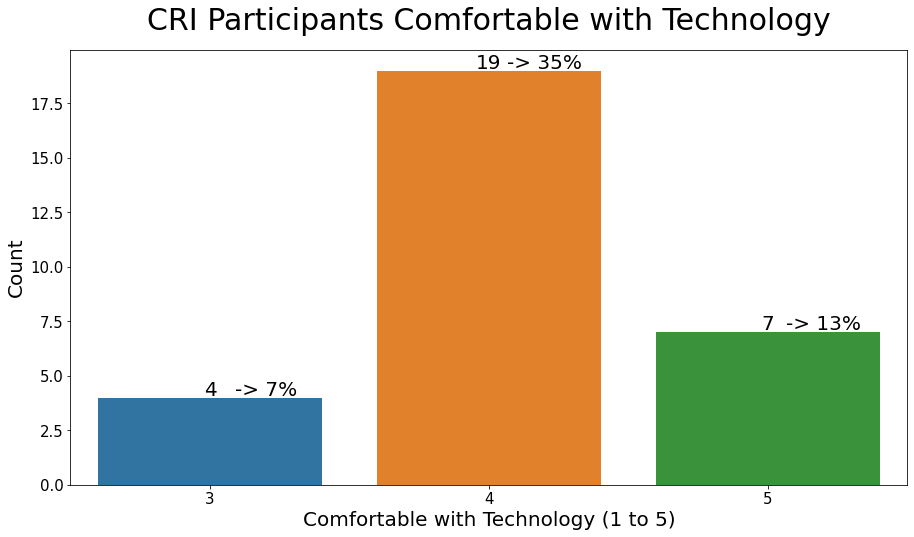

In [38]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_track_focus.sort_values(by='s_comfortable_technology', ascending=True), x='s_comfortable_technology')

plt.xlabel('Comfortable with Technology (1 to 5)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Count', fontsize=20)
plt.title('CRI Participants Comfortable with Technology', fontsize=30, pad=20)

i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_track_focus[df_track_focus['s_comfortable_technology'] == label.get_text()]['s_track'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.show()

0 DiSc
1 LiSc
2 LeSc
3 BSc (Bachelor's)
4 PhD
5 MS
6 FdV
0 Yes
1 No
0 Yes
1 No


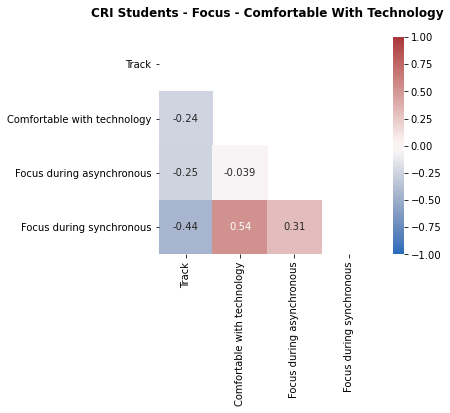

In [39]:
cleanup = {
    "s_track":  create_clean_dict(df_track_focus['s_track'].unique()),
    "s_any_sync":  create_clean_dict(df_track_focus['s_any_sync'].unique()),
    "s_any_asyn":  create_clean_dict(df_track_focus['s_any_asyn'].unique())
}

df_track_focus = df_track_focus.replace(cleanup)

df_track_focus = df_track_focus.astype(float)
corr = df_track_focus.dropna().drop(['s_any_sync', 's_any_asyn'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ['Track', 'Comfortable with technology', 'Focus during asynchronous', 'Focus during synchronous']

ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title('CRI Students - Focus - Comfortable With Technology',
          pad=20, weight='bold')
plt.show()

0 0.0
1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
0 0.0
1 1.0
0 0.0
1 1.0


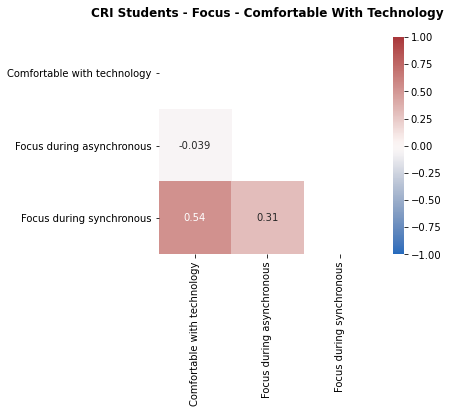

In [40]:
cleanup = {
    "s_track":  create_clean_dict(df_track_focus['s_track'].unique()),
    "s_any_sync":  create_clean_dict(df_track_focus['s_any_sync'].unique()),
    "s_any_asyn":  create_clean_dict(df_track_focus['s_any_asyn'].unique())
}

df_track_focus = df_track_focus.replace(cleanup)

df_track_focus = df_track_focus.astype(float)
corr = df_track_focus.dropna().drop(['s_any_sync', 's_any_asyn', 's_track'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ['Comfortable with technology', 'Focus during asynchronous', 'Focus during synchronous']

ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title('CRI Students - Focus - Comfortable With Technology',
          pad=20, weight='bold')
plt.show()

# 1) Distraction (phone) / Environment(camera, audio, sit)) - Focus

# Async

In [41]:
env = ['s_sit_async', 's_distracted_async', 's_phone_usage_async',
       's_notes_async', 's_pause_async', 's_duration_last_async']

focus = ['s_attentive_async_reflect', 's_focus_async']
df_focus_env_async = df_students[df_students['s_any_asyn'] == 'Yes'][focus+env]

print(df_focus_env_async.shape)
df_focus_env_async.head(2)

(34, 8)


,s_attentive_async_reflect,s_focus_async,s_sit_async,s_distracted_async,s_phone_usage_async,s_notes_async,s_pause_async,s_duration_last_async
1,4,5,At a desk,2,2.0,1,"Twice, or maybe more",> 1 hour
2,4,4,At a desk,2,4.0,4,Just one in the middle of the session,< 30 mins


In [42]:
df_focus_env_async['s_sit_async'] = df_focus_env_async['s_sit_async'].str.strip()

# explode the column s_sit_async
df_focus_env_async['s_sit_async'] = df_focus_env_async['s_sit_async'].str.replace(';', ',').apply(lambda x: list(x.split(',')))
# Remove trailing spaces between items
df_focus_env_async['s_sit_async'] = df_focus_env_async['s_sit_async'].apply(lambda line: [x.strip(' ') for x in line])
df_focus_env_async = df_focus_env_async.explode('s_sit_async')
df_focus_env_async = df_focus_env_async.reset_index()

# Clean
cleanup = {
    "s_sit_async":  create_clean_dict(df_focus_env_async['s_sit_async'].unique()),
    "s_pause_async": {"I don't pause it": 0,
                      "Just one in the middle of the session": 1,
                      "Twice, or maybe more": 2},
    "s_duration_last_async": {"< 30 mins": 0, "1 hour": 1,"> 1 hour": 2}
}
df_focus_env_async = df_focus_env_async.replace(cleanup)
print(df_focus_env_async.shape)
df_focus_env_async.head(2)

0 At a desk
1 In bed
2 In the kitchen while I am cooking
3 Livingroom
4 in the balcony
(52, 9)


,index,s_attentive_async_reflect,s_focus_async,s_sit_async,s_distracted_async,s_phone_usage_async,s_notes_async,s_pause_async,s_duration_last_async
0,1,4,5,0,2,2.0,1,2,2
1,2,4,4,0,2,4.0,4,1,0


Correlation

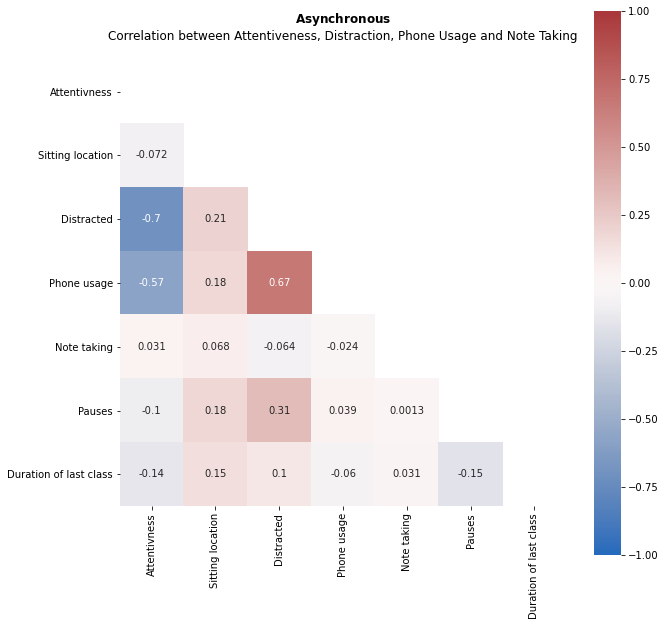

In [43]:
corr = df_focus_env_async.drop(['index', 's_focus_async'], axis=1).dropna().astype(int).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ['Attentivness', 'Sitting location',
          'Distracted',
          'Phone usage', 'Note taking',
         'Pauses', 'Duration of last class']

plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title(set_text_bold('Asynchronous') + '\nCorrelation between Attentiveness, Distraction, Phone Usage and Note Taking',
          pad=20)
plt.show()

# Sync

In [44]:
env_sync = ['s_sit_sync', 's_distracted_sync', 's_phone_usage_sync', 's_notes_sync', 's_why_sync']

focus_sync = ['s_attentive_sync_reflect', 's_sync_impact_on_attention']
df_focus_env_sync = df_students[df_students['s_any_sync'] == 'Yes'][focus_sync+env_sync]
df_focus_env_sync.head(2)

,s_attentive_sync_reflect,s_sync_impact_on_attention,s_sit_sync,s_distracted_sync,s_phone_usage_sync,s_notes_sync,s_why_sync
1,4,4,At a desk,3.0,3,1,My usual classes have changed into remote clas...
2,4,5,At a desk,2.0,2,3,My usual classes have changed into remote clas...


In [45]:
df_focus_env_sync['s_sit_sync'] = df_focus_env_sync['s_sit_sync'].str.rstrip()

# create list of items
df_focus_env_sync['s_sit_sync'] = df_focus_env_sync['s_sit_sync'].str.replace(';', ',').apply(lambda x: list(x.split(',')))
df_focus_env_sync['s_why_sync'] = df_focus_env_sync['s_why_sync'].str.replace(';', ',').apply(lambda x: list(x.split(',')))

# Remove trailing spaces between items
df_focus_env_sync['s_sit_sync'] = df_focus_env_sync['s_sit_sync'].apply(lambda line: [x.strip(' ') for x in line])
df_focus_env_sync['s_why_sync'] = df_focus_env_sync['s_why_sync'].apply(lambda line: [x.strip(' ') for x in line])

# explode the columns
df_focus_env_sync = df_focus_env_sync.explode('s_sit_sync')
df_focus_env_sync = df_focus_env_sync.explode('s_why_sync')
df_focus_env_sync = df_focus_env_sync.reset_index()

# Cleanup
cleanup = {
    "s_sit_sync": create_clean_dict(df_focus_env_sync['s_sit_sync'].unique()),
    "s_why_sync": create_clean_dict(df_focus_env_sync['s_why_sync'].unique())
}

df_focus_env_sync = df_focus_env_sync.replace(cleanup)
print(df_focus_env_sync.shape)
df_focus_env_sync.head(2)

0 At a desk
1 In bed
2 In the kitchen while I am cooking
3 Salle à manger
0 My usual classes have changed into remote class because of lockdown
1 My university courses have been designed to be taught online
2 I applied to online classes outside of my studies
(83, 8)


,index,s_attentive_sync_reflect,s_sync_impact_on_attention,s_sit_sync,s_distracted_sync,s_phone_usage_sync,s_notes_sync,s_why_sync
0,1,4,4,0,3.0,3,1,0
1,2,4,5,0,2.0,2,3,0


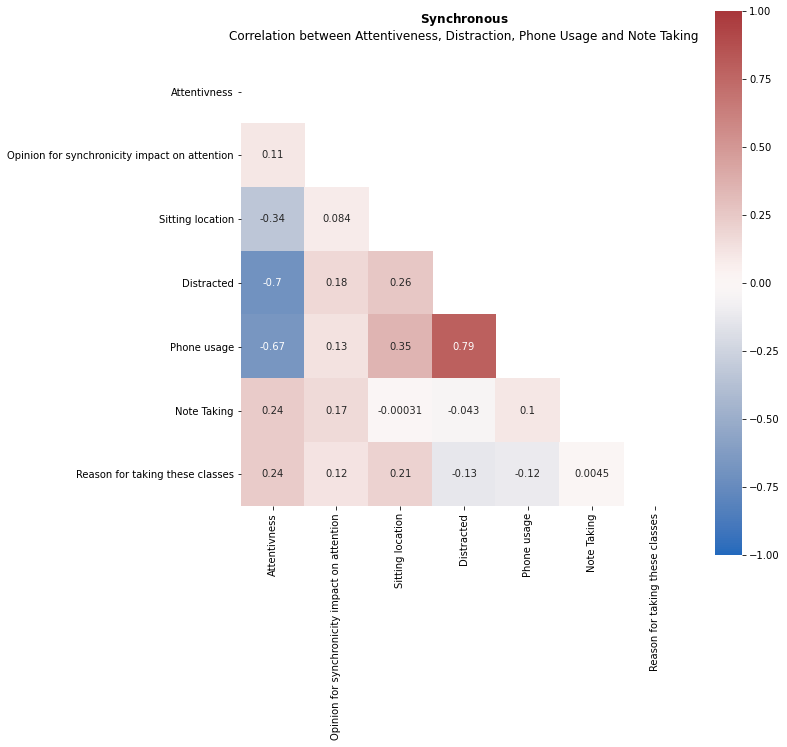

In [46]:
corr = df_focus_env_sync.drop('index', axis=1).dropna().astype(int).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ['Attentivness', 'Opinion for synchronicity impact on attention',
          'Sitting location', 'Distracted',
         'Phone usage', 'Note Taking', 'Reason for taking these classes']

plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title(set_text_bold('Synchronous') + '\nCorrelation between Attentiveness, Distraction, Phone Usage and Note Taking',
          pad=20)
plt.show()

# Async & Sync

In [47]:
env_both = [
    's_sit_async', 's_distracted_async', 's_phone_usage_async', 's_notes_async', 's_why_sync',
    's_sit_sync', 's_distracted_sync', 's_phone_usage_sync', 's_notes_sync', 's_before_lockdown'
]

focus_both = ['s_attentive_async_reflect', 's_attentive_sync_reflect', 's_sync_impact_on_attention']

df_focus_env_both = df_students[np.logical_and(df_students['s_any_asyn'] == 'Yes', df_students['s_any_sync'] == 'Yes')][env_both+focus_both]

df_focus_env_both['s_attentive_sync_reflect'] = df_focus_env_both['s_attentive_sync_reflect'].astype(int)
df_focus_env_both['s_distracted_sync'] = df_focus_env_both['s_distracted_sync'].astype(int)

print(df_focus_env_both.shape)
df_focus_env_both.head(2)

(30, 13)


,s_sit_async,s_distracted_async,s_phone_usage_async,s_notes_async,s_why_sync,s_sit_sync,s_distracted_sync,s_phone_usage_sync,s_notes_sync,s_before_lockdown,s_attentive_async_reflect,s_attentive_sync_reflect,s_sync_impact_on_attention
1,At a desk,2,2.0,1,My usual classes have changed into remote clas...,At a desk,3,3,1,Both campus and online,4,4,4
2,At a desk,2,4.0,4,My usual classes have changed into remote clas...,At a desk,2,2,3,Both campus and online,4,4,5


In [48]:
# create list of items
df_focus_env_both['s_sit_sync'] = df_focus_env_both['s_sit_sync'].str.replace(';', ',').apply(lambda x: list(x.split(',')))
df_focus_env_both['s_sit_async'] = df_focus_env_both['s_sit_async'].str.replace(';', ',').apply(lambda x: list(x.split(',')))
df_focus_env_both['s_why_sync'] = df_focus_env_both['s_why_sync'].str.replace(';', ',').apply(lambda x: list(x.split(',')))

# Remove trailing spaces between items
df_focus_env_both['s_sit_sync'] = df_focus_env_both['s_sit_sync'].apply(lambda line: [x.strip(' ') for x in line])
df_focus_env_both['s_sit_async'] = df_focus_env_both['s_sit_async'].apply(lambda line: [x.strip(' ') for x in line])
df_focus_env_both['s_why_sync'] = df_focus_env_both['s_why_sync'].apply(lambda line: [x.strip(' ') for x in line])

# explode columns
df_focus_env_both = df_focus_env_both.explode('s_sit_sync')
df_focus_env_both = df_focus_env_both.explode('s_sit_async')
df_focus_env_both = df_focus_env_both.explode('s_why_sync')
df_focus_env_both = df_focus_env_both.reset_index()

# Cleanup
cleanup = {
    "s_sit_sync": create_clean_dict(df_focus_env_both['s_sit_sync'].unique()),
    "s_sit_async": create_clean_dict(df_focus_env_both['s_sit_async'].unique()),
    "s_before_lockdown": create_clean_dict(df_focus_env_both['s_before_lockdown'].unique()),
    "s_why_sync":create_clean_dict(df_focus_env_both['s_why_sync'].unique()),
}

df_focus_env_both = df_focus_env_both.replace(cleanup)

df_focus_env_both = df_focus_env_both.astype(int)
print(df_focus_env_both.shape)
df_focus_env_both.head(2)

0 At a desk
1 In bed
2 In the kitchen while I am cooking
0 At a desk
1 In bed
2 In the kitchen while I am cooking
3 Livingroom
4 in the balcony
0 Both campus and online
1 On campus
2 Fully online
0 My usual classes have changed into remote class because of lockdown
1 My university courses have been designed to be taught online
2 I applied to online classes outside of my studies
(103, 14)


,index,s_sit_async,s_distracted_async,s_phone_usage_async,s_notes_async,s_why_sync,s_sit_sync,s_distracted_sync,s_phone_usage_sync,s_notes_sync,s_before_lockdown,s_attentive_async_reflect,s_attentive_sync_reflect,s_sync_impact_on_attention
0,1,0,2,2,1,0,0,3,3,1,0,4,4,4
1,2,0,2,4,4,0,0,2,2,3,0,4,4,5


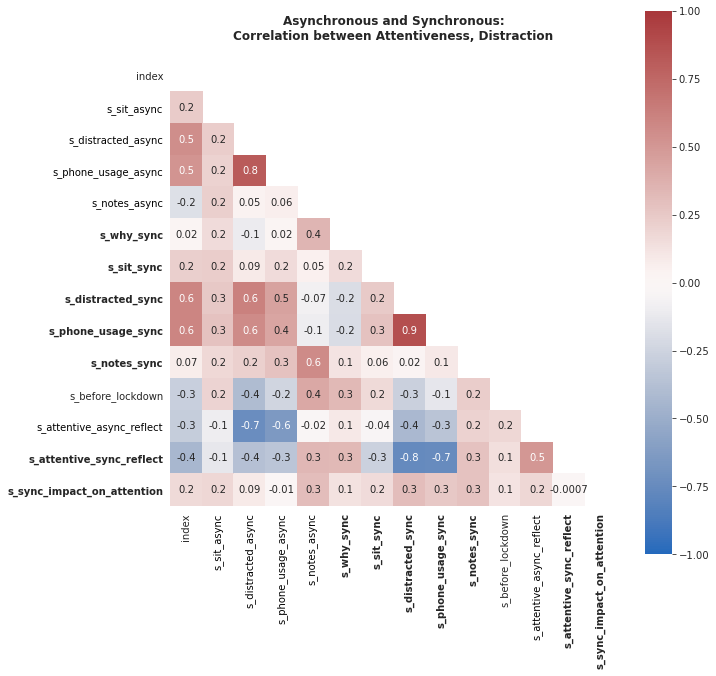

In [49]:
corr = df_focus_env_both.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap='vlag', fmt='.1g', vmin=-1, vmax=1)


for tick in zip(ax.get_xticklabels()):
    if 'async' in tick[-1].get_text():
        tick[-1].set_color('Black')
    elif '_sync' in tick[-1].get_text():
        tick[-1].set_weight('bold')

for tick in zip(ax.get_yticklabels()):
    tick[-1].set_size(10)
    if 'async' in tick[-1].get_text():
        tick[-1].set_color('Black')
    elif '_sync' in tick[-1].get_text():
        tick[-1].set_weight('bold')
    
plt.title('Asynchronous and Synchronous:\nCorrelation between Attentiveness, Distraction',
          pad=20, weight='bold')
plt.show()

# 2) Interaction - Focus

## Async

In [50]:
interaction = ['s_multitask', 's_duration_last_async', 's_notes_async']# s_multitask_activities if s_multitask

focus = ['s_attentive_async_reflect']
df_focus_inter_async = df_students[df_students['s_any_asyn'] == 'Yes'][focus+interaction]

print(df_focus_inter_async.shape)
df_focus_inter_async.head(2)

(34, 4)


,s_attentive_async_reflect,s_multitask,s_duration_last_async,s_notes_async
1,4,3,> 1 hour,1
2,4,2,< 30 mins,4


In [51]:
# Categorical Variables to Numerical Variables

cleanup = {
    "s_duration_last_async": {"< 30 mins": 0, "1 hour": 1,"> 1 hour": 2}
}
df_focus_inter_async = df_focus_inter_async.replace(cleanup)
print(df_focus_inter_async.shape)
df_focus_inter_async.head(2)

(34, 4)


,s_attentive_async_reflect,s_multitask,s_duration_last_async,s_notes_async
1,4,3,2,1
2,4,2,0,4


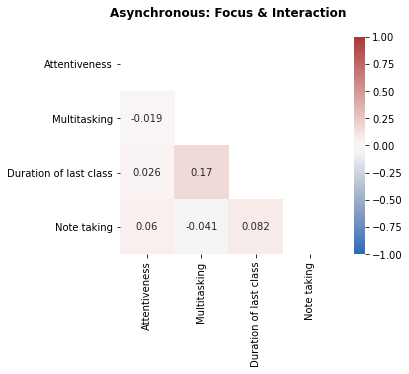

In [52]:
corr = df_focus_inter_async.dropna().astype(int).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ["Attentiveness", "Multitasking", "Duration of last class", 'Note taking']

ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap='vlag', vmin=-1, vmax=1,
        xticklabels=labels, yticklabels=labels)

plt.title('Asynchronous: Focus & Interaction',
          pad=20, weight='bold')
plt.show()

## Sync

In [53]:
interaction = ['s_camera_status', 's_camera_not_asked', 's_multitask', 's_multitask_activities',
       's_questions_sync', 's_notes_sync']

focus = ['s_attentive_sync_reflect']
df_focus_inter_sync = df_students[df_students['s_any_sync'] == 'Yes'][focus+interaction]

print(df_focus_inter_sync.shape)
df_focus_inter_sync.head(2)

(47, 7)


,s_attentive_sync_reflect,s_camera_status,s_camera_not_asked,s_multitask,s_multitask_activities,s_questions_sync,s_notes_sync
1,4,3,"Depends, if few other student open their camer...",3,"House chores, Playing online games",3,1
2,4,3,"Depends, if few other student open their camer...",2,Just getting distracted by anything around me,2,3


In [54]:
df_focus_inter_sync['s_multitask_activities'] = df_focus_inter_sync['s_multitask_activities'].str.strip()

# Create list of items
df_focus_inter_sync['s_multitask_activities'] = df_focus_inter_sync['s_multitask_activities'].apply(lambda x: list(x.split(',')))

# Remove trailing spaces between items
df_focus_inter_sync['s_multitask_activities'] = df_focus_inter_sync['s_multitask_activities'].apply(lambda line: [x.strip(' ') for x in line])


# Explode columns
df_focus_inter_sync = df_focus_inter_sync.explode('s_multitask_activities')

# Categorical Variables to Numerical Variables
cleanup = {
    "s_camera_not_asked": {
        "I never turn my camera on": 0,
        'No': 1,
        'Depends, if few other student open their camera then I might open mine': 2,
        'Yes': 3,
    },
    's_multitask_activities': create_clean_dict(df_focus_inter_sync['s_multitask_activities'].unique())
}
df_focus_inter_sync = df_focus_inter_sync.replace(cleanup)
print(df_focus_inter_sync.shape)
df_focus_inter_sync.head(2)

0 House chores
1 Playing online games
2 Just getting distracted by anything around me
3 Work and studies related tasks
4 Talking to colleagues
5 team members
6 Chating with friends
7 Music
8 Wandering on the internet and social media
9 Drawing
10 doing other courses assignments
11 Research on internet content that was not clear
12 I don't multitask
(178, 7)


,s_attentive_sync_reflect,s_camera_status,s_camera_not_asked,s_multitask,s_multitask_activities,s_questions_sync,s_notes_sync
1,4,3,2,3,0,3,1
1,4,3,2,3,1,3,1


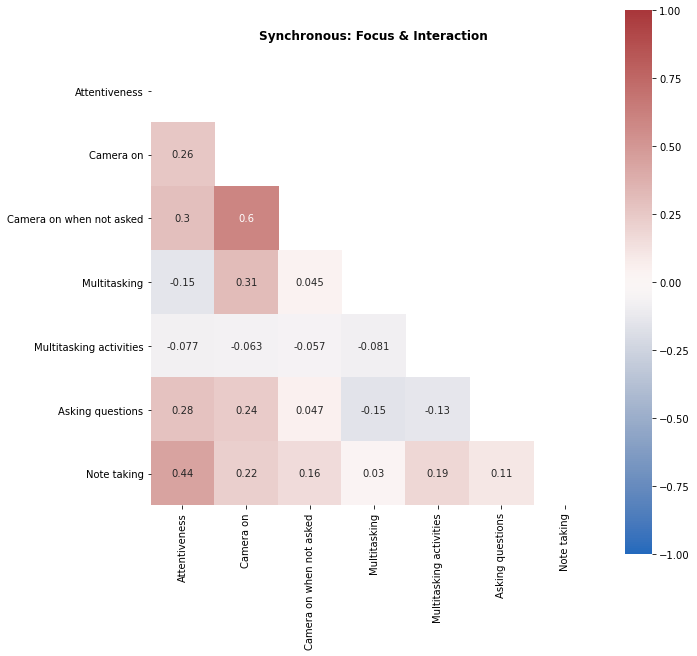

In [55]:
corr = df_focus_inter_sync.dropna().astype(int).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


labels = ["Attentiveness", "Camera on",
         "Camera on when not asked", "Multitasking",
        "Multitasking activities", "Asking questions",
        "Note taking"]

plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title('Synchronous: Focus & Interaction',
          pad=20, weight='bold')
plt.show()

# Prefered - Focus

## Async & Sync

In [56]:
prefered = ['s_pref_books', 's_pref_articles_tutorials', 's_pref_videos', 's_pref_other', "s_favorite"]

focus = ['s_focus_async', 's_focus_sync']
df_focus_pref_async = df_students[focus+prefered]

print(df_focus_pref_async.shape)
df_focus_pref_async.head(2)

(54, 7)


,s_focus_async,s_focus_sync,s_pref_books,s_pref_articles_tutorials,s_pref_videos,s_pref_other,s_favorite
1,5,4,1,0,0,0,"Asynchronous classes (MOOCs, recordings)"
2,4,5,1,0,0,0,Synchronous classes (Zoom call)


In [57]:
# Categorical Variables to Numerical Variables
cleanup = {
    's_favorite':  create_clean_dict(df_focus_pref_async['s_favorite'].unique())
}

df_focus_pref_async = df_focus_pref_async.replace(cleanup)
df_focus_pref_async = df_focus_pref_async.astype(float)
print(df_focus_pref_async.shape)
df_focus_pref_async.head(2)

0 Asynchronous classes (MOOCs, recordings)
1 Synchronous classes (Zoom call)
2 Neither, in person classes
3 I think asynchronous classes could be complementary with synchronous ones, for e.g getting familiar with a topic in an asynchronous way and then pursueing it on zoom with students +  teacher,  so I think my favorite option would be something more balanced like that
4 This question is based on the specific course content and how well the course was designed.
5 Synchronous that are recored. So a mix of both. I Pay less attention in MOOC, but doing first the Zoom call and then reviewing specific material in the recordings has been great. 
6 I don't have a preference. They all have their pros and cons.
7 Really depends on how it's done
8 nan
(54, 7)


,s_focus_async,s_focus_sync,s_pref_books,s_pref_articles_tutorials,s_pref_videos,s_pref_other,s_favorite
1,5.0,4.0,1.0,0.0,0.0,0.0,0.0
2,4.0,5.0,1.0,0.0,0.0,0.0,1.0


Correlation map

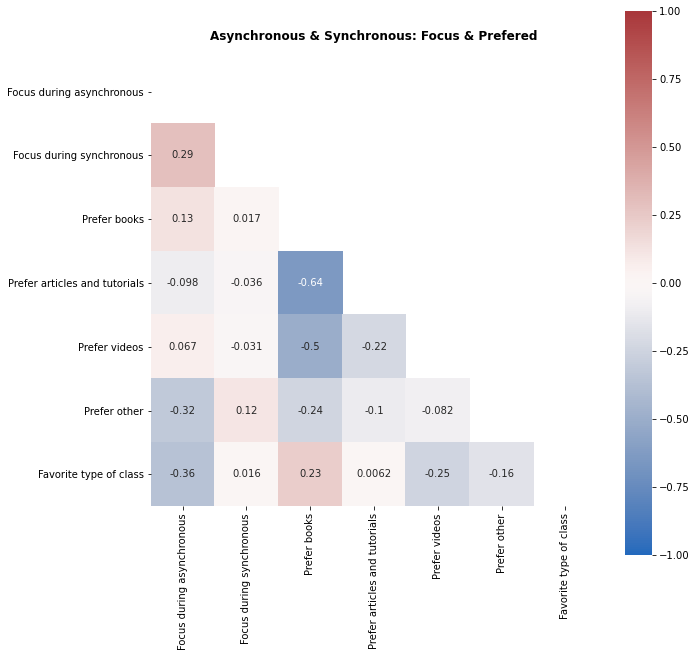

In [58]:
corr = df_focus_pref_async.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels = ["Focus during asynchronous", "Focus during synchronous",
          "Prefer books", "Prefer articles and tutorials",
         "Prefer videos", "Prefer other", "Favorite type of class"]

plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title('Asynchronous & Synchronous: Focus & Prefered',
          pad=20, weight='bold')
plt.show()

# Teachers:

In [70]:
df_teachers.head(2)

,Timestamp,role,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by,t_challenges
0,12/9/2020 10:10:46,A teacher?,4,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3,3,Online synchronous classes,To make sure participants understand the topic...
18,12/9/2020 18:18:17,A teacher?,3,"I ask them some questions, I ask them to give ...",1,No,"Yes, but not mandatory",Yes,3,2,Online asynchronous classes,How to keep students motivated until the end o...


In [71]:
df_teachers.columns

Index(['Timestamp', 'role', 't_involved', 't_participation_type',
       't_nb_breaks', 't_notice_unfocused', 't_camera_audio_on',
       't_camera_helps', 't_screen_monitoring', 't_describe_courses',
       't_fatigued_by', 't_challenges'],
      dtype='object')

**Explore Data**

In [72]:
env = ['t_participation_type',
       't_nb_breaks', 't_notice_unfocused', 't_camera_audio_on',
       't_camera_helps', 't_screen_monitoring', 't_describe_courses',
       't_fatigued_by']

involv = ['t_involved']
df_focus_env = df_teachers.copy()
df_focus_env = df_focus_env[involv+env]

print(df_focus_env.shape)
df_focus_env.head(2)

(10, 9)


,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by
0,4,"I ask them to work in groups, I ask them to gi...",1,No,"Yes, but not mandatory",Yes,3,3,Online synchronous classes
18,3,"I ask them some questions, I ask them to give ...",1,No,"Yes, but not mandatory",Yes,3,2,Online asynchronous classes


In [73]:
# explode the column t_participation_type
df_focus_env['t_participation_type'] = df_focus_env['t_participation_type'].str.replace(';', ',').apply(lambda x: list(x.split(',')))

df_focus_env = df_focus_env.explode('t_participation_type')

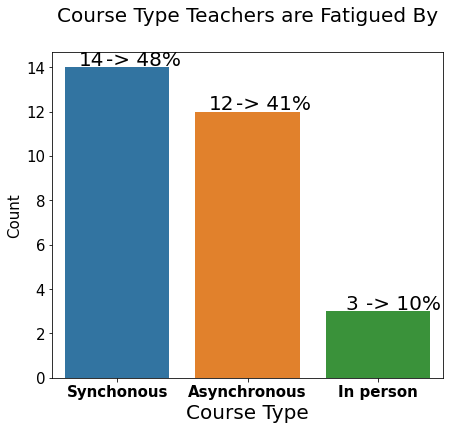

In [74]:
f, ax = plt.subplots(figsize=(7, 6))
ax=sns.countplot(x="t_fatigued_by", data=df_focus_env)

plt.ylabel('Count', fontsize=15)
plt.xlabel('Course Type', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_focus_env[df_focus_env['t_fatigued_by'] == label.get_text()]['t_fatigued_by'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. - 0.2, height + 0.1, value,ha="center", fontsize=20)
    ax.text(p.get_x()+p.get_width()/2. + 0.2, height + 0.1, '-> {0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

ax.set_xticklabels(['Synchonous','Asynchronous','In person'], weight='bold')
plt.title('Course Type Teachers are Fatigued By', pad=30, fontsize=20)
plt.show()

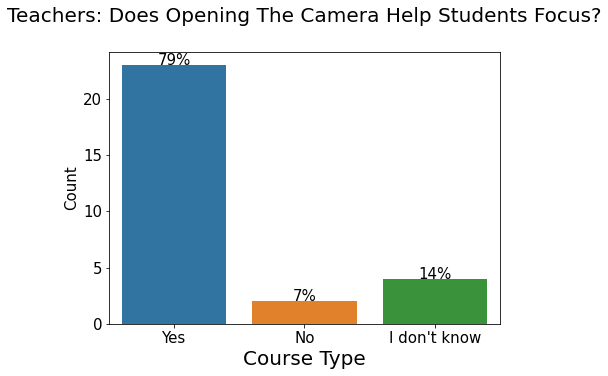

In [75]:
f, ax = plt.subplots(figsize=(7, 5))
ax=sns.countplot(x="t_camera_helps", data=df_focus_env)

plt.ylabel('Count', fontsize=15)
plt.xlabel('Course Type', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

total = float(len(df_focus_env)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(np.around(p.get_x() + p.get_width()/2., decimals=1),
            height,
            '{0:.0%}'.format(height/total),
            ha="center", fontsize=15) 

plt.title('Teachers: Does Opening The Camera Help Students Focus?', pad=30, fontsize=20)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


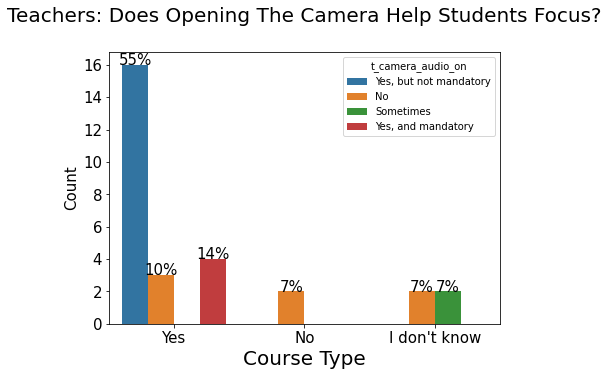

In [76]:
f, ax = plt.subplots(figsize=(7, 5))
ax=sns.countplot(x="t_camera_helps", data=df_focus_env, hue='t_camera_audio_on')

plt.ylabel('Count', fontsize=15)
plt.xlabel('Course Type', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

total = float(len(df_focus_env)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(np.around(p.get_x() + p.get_width()/2., decimals=1),
            height,
            '{0:.0%}'.format(height/total),
            ha="center", fontsize=15) 

plt.title('Teachers: Does Opening The Camera Help Students Focus?', pad=30, fontsize=20)
plt.show()

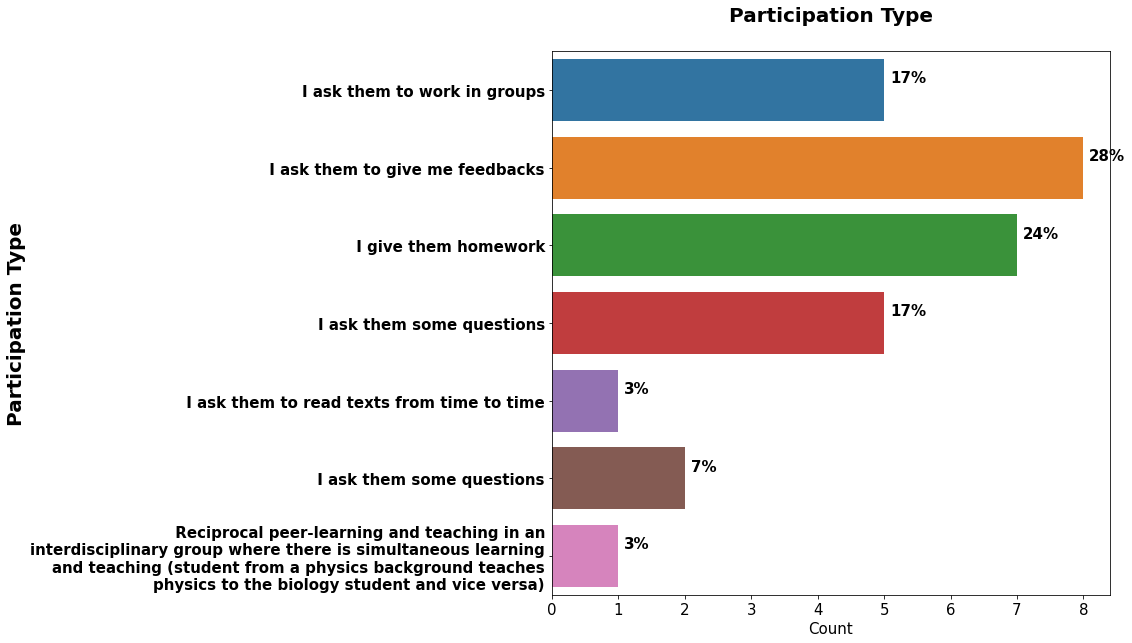

In [77]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.countplot(
    y="t_participation_type",
    data=df_focus_env
)

plt.xlabel('Count', fontsize=15)
plt.ylabel('Participation Type', fontsize=20, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)

labels = [ '\n'.join(wrap(l, 60)) for l in [i.get_text() for i in ax.get_yticklabels()] ]

ax.set_yticklabels(labels, weight='bold')

total = float(len(df_focus_env))
for i in ax.patches:
    width = i.get_width()
    ax.text(i.get_width()+.09, i.get_y()+.3, '{0:.0%}'.format(width/total), fontsize=15, weight='bold')

plt.title('Participation Type', pad=30, fontsize=20, weight='bold')
plt.show()

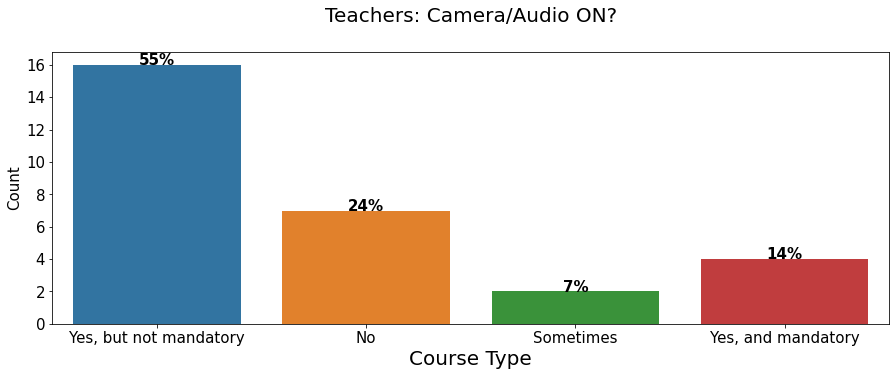

In [78]:
f, ax = plt.subplots(figsize=(15, 5))
ax=sns.countplot(x="t_camera_audio_on", data=df_focus_env)

plt.ylabel('Count', fontsize=15)
plt.xlabel('Course Type', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

total = float(len(df_focus_env)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(np.around(p.get_x() + p.get_width()/2., decimals=1),
            height,
            '{0:.0%}'.format(height/total),
            ha="center", fontsize=15, weight='bold') 

plt.title('Teachers: Camera/Audio ON?', pad=30, fontsize=20)
plt.show()

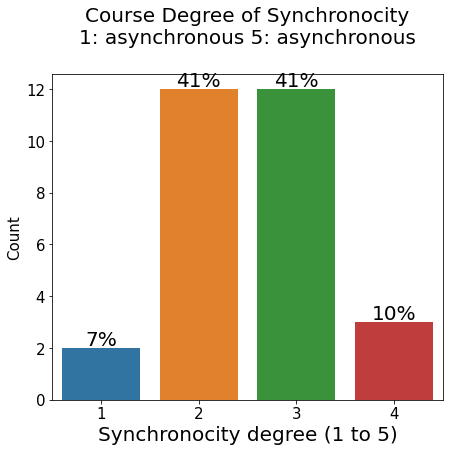

In [110]:
f, ax = plt.subplots(figsize=(7, 6))
ax=sns.countplot(x="t_describe_courses", data=df_focus_env)

plt.ylabel('Count', fontsize=15)
plt.xlabel('Synchronocity degree (1 to 5)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

total = float(len(df_focus_env))
i = 0
for p, label in zip(ax.patches, ax.get_xticklabels()):
    value = df_focus_env[df_focus_env['t_describe_courses'] == int(label.get_text())]['t_describe_courses'].count()
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, '{0:.0%}'.format(value/total),ha="center", fontsize=20)
    i += 1

plt.title('Course Degree of Synchronocity\n1: asynchronous 5: asynchronous', pad=30, fontsize=20)
plt.show()

**Analysis**

In [68]:
cleanup = {
    't_participation_type': create_clean_dict(df_focus_env['t_participation_type'].unique()),
    't_camera_audio_on': {'No': 0, 'Yes': 1, 'Yes, but not mandatory': 2, 'Sometimes': 3, 'Yes, and mandatory': 4},
    't_fatigued_by': {'In person classes': 3, 'Online synchronous classes': 2, 'Online asynchronous classes': 1},
    't_camera_helps': {'No': 0, 'Yes': 1, 'I don\'t know': 2},
    't_notice_unfocused': {'No': 0, 'Yes': 1, 'Probably': 2}
}
df_focus_env = df_focus_env.replace(cleanup)
print(df_focus_env.shape)
df_focus_env.head(2)

0 I ask them to work in groups
1  I ask them to give me feedbacks
2  I give them homework
3 I ask them some questions
4  I ask them to read texts from time to time
5  I ask them some questions
6  Reciprocal peer-learning and teaching in an interdisciplinary group where there is simultaneous learning and teaching (student from a physics background teaches physics to the biology student and vice versa)
(29, 9)


,t_involved,t_participation_type,t_nb_breaks,t_notice_unfocused,t_camera_audio_on,t_camera_helps,t_screen_monitoring,t_describe_courses,t_fatigued_by
0,4,0,1,0,2,1,3,3,2
0,4,1,1,0,2,1,3,3,2


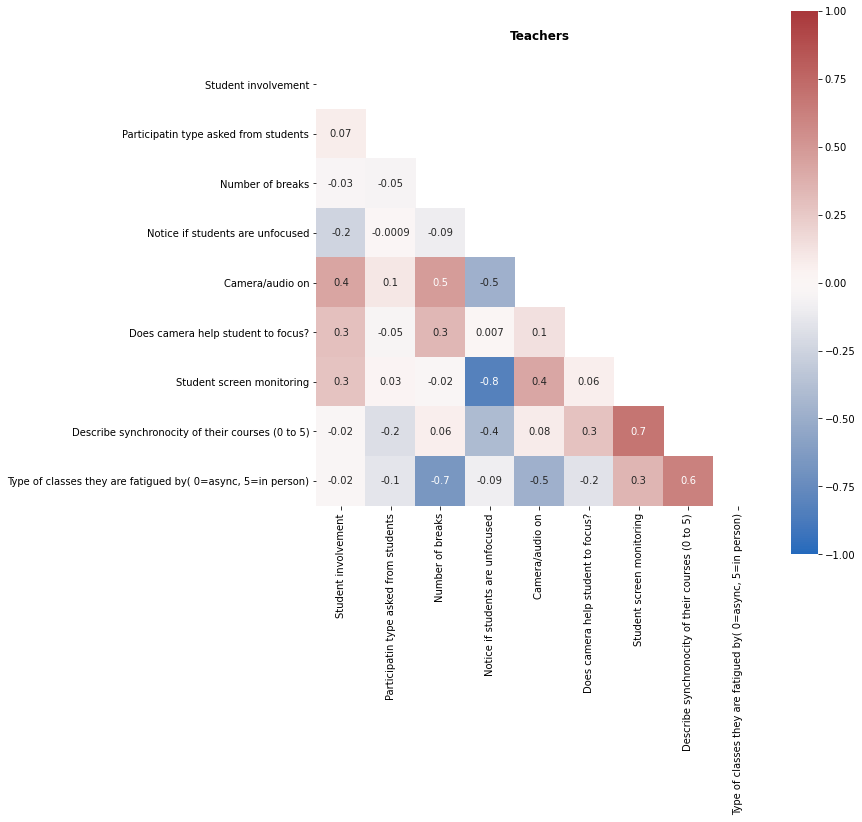

In [69]:
corr = df_focus_env.dropna().astype(int).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

labels=["Student involvement", "Participatin type asked from students",
       "Number of breaks", "Notice if students are unfocused",
        "Camera/audio on", "Does camera help student to focus?",
       "Student screen monitoring", "Describe synchronocity of their courses (0 to 5)",
       "Type of classes they are fatigued by( 0=async, 5=in person)"]

plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, square=True,annot = True, cmap='vlag', fmt='.1g', vmin=-1, vmax=1,
                xticklabels=labels, yticklabels=labels)

plt.title('Teachers',
          pad=20, weight='bold')
plt.show()